In [ ]:
# 1.0 Collecte et Exploration des Données
## Charger le dataset et explorer ses caractéristiques.
import pandas

dataframe = pandas.read_csv("Breast Cancer Wisconsin.csv")
dataframe = dataframe.iloc[:, 1:] # exclusion du champs 'id'
## Visualiser les relations entre les caractéristiques et les classes de tumeurs.
dataframe.info()


# Pour rendre notre modèle stable, on utilise
import random, numpy
random.seed(0)
numpy.random.seed(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# 2.0 Prétraitement des Données
## Vérifier s'il y a des valeurs manquantes
print(dataframe.isnull().sum()) # On distingue qu'on a aucune valeur manquante 

## Vérifier s'il y a des valeurs aberrantes
from sklearn.ensemble import IsolationForest
X = dataframe.iloc[:, 1:] 
y = dataframe.iloc[:, 0] 
model = IsolationForest(contamination=0.05)
outliers = model.fit_predict(X) # Les outliers sont marqués par -1
print(len(outliers))

## Normaliser les données si nécessaire.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
print("Les données avant la normalisation")
print(X)
standard_scaler.fit_transform(X=X)
print("Les données après la normalisation")
print(X)

## Division des données en ensembles d'entraînement et de test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
569
Les données avant la normalisation
     radius_mean  texture_mean  perimeter_mean  a

In [ ]:
# 3.0 Construction des Modèles & 4.0 Entraînement des Modèles
## Régression linéaire simple      ❌
## Régression linéaire multiple    ❌
## Régression linéaire polynomiale ❌

## Régression logistique ✅
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=100)
for hyperparameter in [100, 200, 300, 400]:
    log_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=hyperparameter)
    log_model.fit(X_train, y_train)
    print(f"{log_model.score(X_test, y_test)} avec max_iter = {hyperparameter}")
best_log_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=100)
best_log_model.fit(X_train, y_train)
print("--------------------------------------")
 

## K-NN ✅
from sklearn.neighbors import KNeighborsClassifier
for hyperparameter in range(3, 11):
    knn_model = KNeighborsClassifier(n_neighbors=hyperparameter, weights='distance', p=2)
    knn_model.fit(X_train, y_train)
    print(f"{knn_model.score(X_test, y_test)} avec n_neighbors = {hyperparameter}")
best_knn_model = KNeighborsClassifier(n_neighbors=6)
best_knn_model.fit(X_train, y_train)
print("--------------------------------------")

## Arbre de Décision ✅   
from sklearn.tree import DecisionTreeClassifier
for hyperparameter in [None, 1, 2, 3, 4, 5, 6]:
    tree_model = DecisionTreeClassifier(max_depth=hyperparameter)
    tree_model.fit(X_train, y_train)
    print(f"{tree_model.score(X_test, y_test)} avec max_depth = {hyperparameter}")
best_tree_model = DecisionTreeClassifier(max_depth=3)
best_tree_model.fit(X_train, y_train)

0.9767441860465116 avec max_iter = 100
0.9767441860465116 avec max_iter = 200
0.9767441860465116 avec max_iter = 300
0.9767441860465116 avec max_iter = 400
--------------------------------------
0.9534883720930233 avec n_neighbors = 3
0.9534883720930233 avec n_neighbors = 4
0.9534883720930233 avec n_neighbors = 5
0.9651162790697675 avec n_neighbors = 6
0.9534883720930233 avec n_neighbors = 7
0.9534883720930233 avec n_neighbors = 8
0.9534883720930233 avec n_neighbors = 9
0.9534883720930233 avec n_neighbors = 10
--------------------------------------
0.8953488372093024 avec max_depth = None
0.8837209302325582 avec max_depth = 1
0.9418604651162791 avec max_depth = 2
0.9651162790697675 avec max_depth = 3
0.9302325581395349 avec max_depth = 4
0.9302325581395349 avec max_depth = 5
0.9302325581395349 avec max_depth = 6


DecisionTreeClassifier(max_depth=3)

In [ ]:
# 5.0 Évaluation des Modèles
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_log_model():
    import matplotlib.pyplot as plt
    import seaborn
    y_predicted = best_log_model.predict(X_test)
    print(f"Precision score = {precision_score(y_test, y_predicted, pos_label='B')}")
    print(f"Rappel score = {recall_score(y_test, y_predicted, pos_label='B')}")
    print(f"Score f1 score = {f1_score(y_test, y_predicted, pos_label='B')}")
    conf_matrix = confusion_matrix(y_test, y_predicted)
    seaborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.title("Matrice de confusion")
    plt.show()
evaluate_log_model()

def evaluate_knn_model():
    import matplotlib.pyplot as plt
    import seaborn
    y_predicted = best_knn_model.predict(X_test)
    print(f"Precision score = {precision_score(y_test, y_predicted, pos_label='B')}")
    print(f"Rappel score = {recall_score(y_test, y_predicted, pos_label='B')}")
    print(f"Score f1 score = {f1_score(y_test, y_predicted, pos_label='B')}")
    conf_matrix = confusion_matrix(y_test, y_predicted)
    seaborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.title("Matrice de confusion")
    plt.show()
evaluate_knn_model()

def evaluate_tree_model():
    import matplotlib.pyplot as plt
    import seaborn
    y_predicted = best_tree_model.predict(X_test)
    print(f"Precision score = {precision_score(y_test, y_predicted, pos_label='B')}")
    print(f"Rappel score = {recall_score(y_test, y_predicted, pos_label='B')}")
    print(f"Score f1 score = {f1_score(y_test, y_predicted, pos_label='B')}")
    conf_matrix = confusion_matrix(y_test, y_predicted)
    seaborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.title("Matrice de confusion")
    plt.show()
evaluate_tree_model()


Coefficients pour la Régression Logistique (triés par valeur absolue) :
radius_mean               -3.297047
concavity_worst            2.814846
texture_se                -2.347371
radius_worst              -1.944078
compactness_worst          1.851395
concave_points_worst       1.252183
symmetry_worst             1.104781
concavity_mean             1.094641
concave_points_mean        0.624912
compactness_mean           0.604789
smoothness_worst           0.516889
texture_worst              0.471681
symmetry_mean              0.351303
smoothness_mean            0.281489
perimeter_mean             0.231368
perimeter_worst            0.196464
fractal_dimension_worst    0.176190
texture_mean              -0.148518
area_se                    0.137366
concave_points_se          0.078083
compactness_se            -0.062625
symmetry_se                0.052025
concavity_se               0.050100
perimeter_se              -0.045289
smoothness_se              0.030334
area_worst                 

C:\Users\HassanOuammou\AppData\Local\Temp\ipykernel_15256\481837202.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index, palette='viridis')


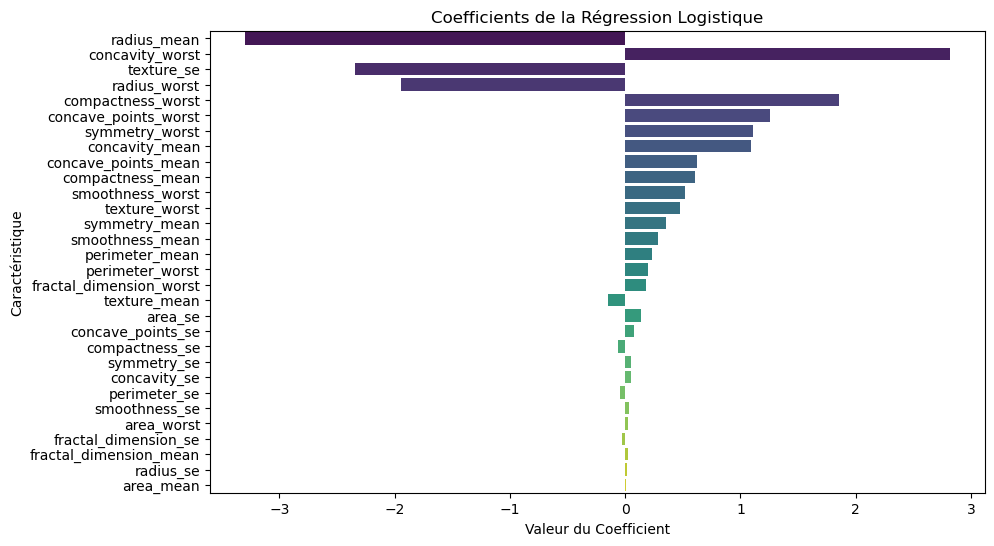

In [ ]:
# 6.0 Interprétation des Résultats

##Analyse des caractéristiques qui influent le plus sur la prédiction du diagnostic du cancer du sein
### selon les modèles développés.
"""
Nous avons décidé d’implémenter tous les algorithmes d’apprentissage vus en classe, et nous avons remarqué que les algorithmes appropriés pour ce travail sont : la régression logistique, KNN et l’arbre de décision. Nous avons également observé, durant l’entraînement, que ces algorithmes sont influencés par certains paramètres.

Pour la régression logistique, nous avons utilisé :
    solver='liblinear' (algorithme d’optimisation efficace pour petits jeux de données),
    C=10.0 (contrôle la régularisation pour éviter le sur-apprentissage),
    random_state=0 (assure la reproductibilité des résultats),
    max_iter (nombre maximal d’itérations pour garantir la convergence).

Pour KNN :
    n_neighbors (nombre de voisins pris en compte pour la classification),
    weights='distance' (poids plus importants aux voisins proches),
    p=2 (utilise la distance euclidienne pour mesurer la proximité).

Pour l’arbre de décision :
    max_depth (profondeur maximale de l’arbre pour contrôler sa complexité et éviter le surapprentissage).
"""
# En supposant que vous avez entraîné votre best_log_model et que les noms de vos caractéristiques sont dans X.columns
import pandas as pd
import numpy as np

# Obtenir les coefficients du modèle Régression Logistique entraîné
# Si votre modèle a été entraîné sur des données mises à l'échelle (ce qui est recommandé pour la RL)
# les coefficients peuvent être directement comparés en termes d'ampleur.
coefficients = best_log_model.coef_[0] # En supposant une classification binaire

# Créer une série pandas pour une meilleure visualisation
coefficient_series = pd.Series(coefficients, index=X.columns)

# Trier les caractéristiques par la valeur absolue de leurs coefficients
sorted_coefficients = coefficient_series.reindex(coefficient_series.abs().sort_values(ascending=False).index)

# Afficher ou tracer les coefficients
print("\nCoefficients pour la Régression Logistique (triés par valeur absolue) :")
print(sorted_coefficients)

# Optionnel : Tracer les coefficients
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index, palette='viridis')
plt.title("Coefficients de la Régression Logistique")
plt.xlabel("Valeur du Coefficient")
plt.ylabel("Caractéristique")
plt.show()

## Identification des caractéristiques les plus importantes pour la classification des tumeurs.

In [ ]:
# 7. Déploiement et Utilisation (optionnel)
import openpyxl
import openpyxl.utils
import csv 

def french2english(word):
    translated_names = {
        "Rayon moyen"                  : "radius_mean",
        "Texture moyenne"              : "texture_mean",
        "Périmètre moyen"              : "perimeter_mean",
        "Aire moyenne"                 : "area_mean",
        "Lissé moyen"                  : "smoothness_mean",
        "Compacité moyenne"            : "compactness_mean",
        "Concavité moyenne"            : "concavity_mean",
        "Points concaves moyens"       : "concave_points_mean",
        "Symétrie moyenne"             : "symmetry_mean",
        "Dimension fractale moyenne"   : "fractal_dimension_mean",
        "Écart type rayon"             : "radius_se",
        "Écart type texture"           : "texture_se",
        "Écart type périmètre"         : "perimeter_se",
        "Écart type aire"              : "area_se",
        "Écart type lissé"             : "smoothness_se",
        "Écart type compacité"         : "compactness_se",
        "Écart type concavité"         : "concavity_se",
        "Écart type points concaves"   : "concave_points_se",
        "Écart type symétrie"          : "symmetry_se",
        "Écart type dimension fractale": "fractal_dimension_se",
        "Rayon pire"                   : "radius_worst",
        "Texture pire"                 : "texture_worst",
        "Périmètre pire"               : "perimeter_worst",
        "Aire pire"                    : "area_worst",
        "Lissé pire"                   : "smoothness_worst",
        "Compacité pire"               : "compactness_worst",
        "Concavité pire"               : "concavity_worst",
        "Points concaves pires"        : "concave_points_worst",
        "Symétrie pire"                : "symmetry_worst",
        "Dimension fractale pire"      : "fractal_dimension_worst"
    } 
    for frenchname, englishname in translated_names.items():
        if(word == frenchname):
            return englishname


workbook = openpyxl.load_workbook("./Book_filled.xlsx")
sheet    = workbook.active

names = []
for index in range(2, (sheet.max_row + 1)):
    names.append(french2english(sheet[f"A{index}"].value))


patients_values = []
for i in range(2, (sheet.max_column + 1)):
    column_letter = openpyxl.utils.get_column_letter(i)
    patient_values = []
    for j in range(2, (sheet.max_row + 1)):
        patient_values.append(sheet[f"{column_letter}{j}"].value)
    patients_values.append(patient_values)



with open("Book.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(names)
    for patient_values in patients_values:
        writer.writerow(patient_values)


data = pandas.read_csv("./Book.csv")
best_knn_model.predict(data)





if __name__ == "__main__":
    print("hello")


hello
